<a href="https://colab.research.google.com/github/tyceaddley/WGU/blob/master/CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.metrics import *
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
import pydot
from imblearn.over_sampling import SMOTE

from keras.models import Sequential 
from keras.layers import Dense, Dropout 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [0]:
#load data set into the data frame "df"
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CapStone/creditcardfraud/creditcard.csv")

In [3]:
#view the first 10 lines of the data frame
#class 0 = no fraud 
#class 1 = fraud
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
#print the shape of the df 
print(df.shape)
print(df.describe())
#8rowsX31columns

(284807, 31)
                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


No handles with labels found to put in legend.


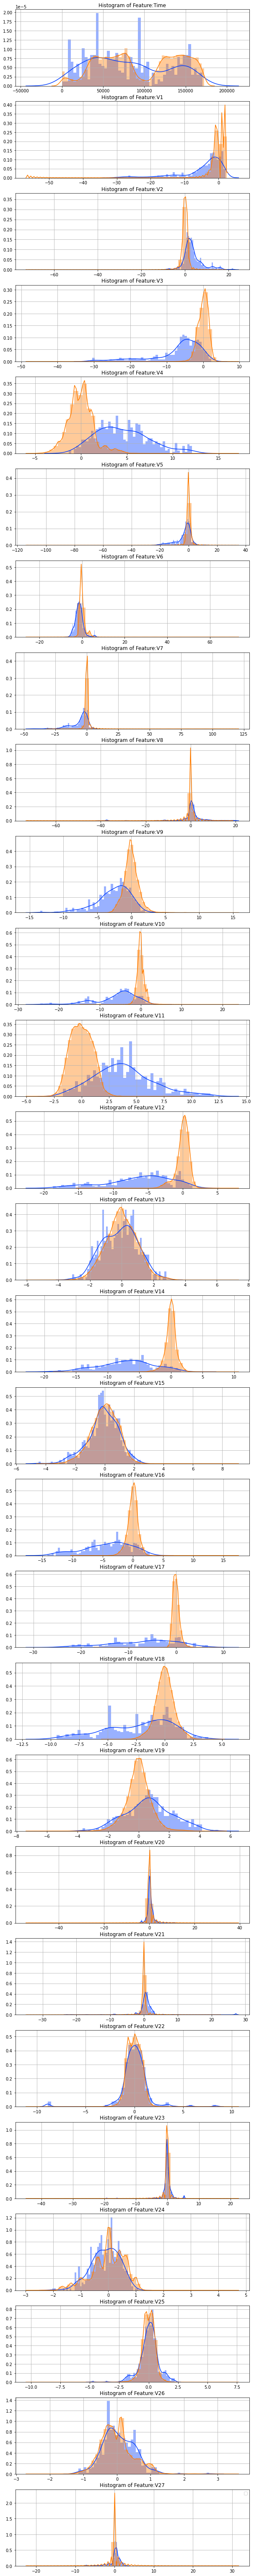

In [37]:
#features of df 
feature=df.iloc[:,0:28].columns

sns.set_palette("bright")

plt.figure(figsize=(10,28*4))
gridspecs=gridspec.GridSpec(28,1)
for i, c in enumerate(df[feature]):
  ax=plt.subplot(gridspecs[i])
  sns.distplot(df[c][df.Class==1],bins=50)
  sns.distplot(df[c][df.Class==0],bins=50)
  ax.grid(True)
  ax.set_xlabel('')
  ax.set_title('Histogram of Feature:' +str(c))
plt.legend()
plt.show()

In [6]:
#set variables for the fraudulent cases and real customer cases:
Fraudulent=df[df['Class']==1]
Honest=df[df['Class']==0]

#calculating percentage of fraudulent cases over honest customers into out_fract variable
out_fract=len(Fraudulent)/float(len(Honest))
print(out_fract)

#print the cases of each from df
print('Fraudulent Cases:{}'.format(len(df[df['Class']==1])))
print('Honest Cases:{}'.format(len(df[df['Class']==0])))

#0.17305% fraudulent cases, need to oversample data due to rarity

0.0017304750013189597
Fraudulent Cases:492
Honest Cases:284315


In [7]:
print("Statistical description of Fraudulent transaction cases:")
Fraudulent.Amount.describe()

Statistical description of Fraudulent transaction cases:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
print("Statistical description of Honest customer transactions:")
Honest.Amount.describe()
#it appears that the mean for frauduelent transactions is higher 122.21>88.29

Statistical description of Honest customer transactions:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

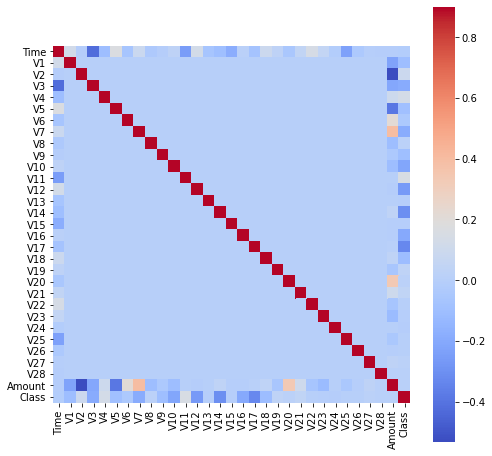

In [9]:
#Create a correlation matrix to identify any possible correlations
corr_maps=df.corr()
figure=plt.figure(figsize=(8,8))

sns.heatmap(corr_maps, vmax=.9, square=True, cmap="coolwarm")
plt.show()

#sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1)

In [10]:
#divide the values into the features and targets "x and y"
X=df.drop('Class', axis=1)
y=df["Class"]
print(X.shape)
print(y.shape)
x_data=X.values
y_data=y.values

(284807, 30)
(284807,)


In [0]:
#split the dataset into training and validation using scikitlearn
x_train, x_test, y_train, y_test =train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [0]:
#create the isolation forest model without oversampling
isofor=IsolationForest(max_samples=len(x_train), contamination=out_fract, random_state=1)
isofor.fit(x_train)

#set the score decision function to score_pred variable
score_pred=isofor.decision_function(x_train)
y_pred=isofor.predict(x_test)

In [0]:
#evaluate when the predicted values are correct and incorrect
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

n_errors=(y_pred != y_test).sum()

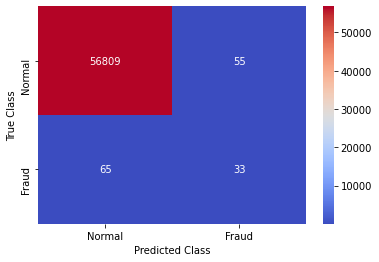

In [15]:
labels =['Normal', 'Fraud']
con_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, xticklabels=labels, yticklabels=labels, annot=True, cmap="coolwarm", fmt='.0f');
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [16]:
#model measures without using an oversampling dataset to increase sensitivity
n_outliers=len(Fraudulent)
print("The Model used is {}".format("Isolation Forest"))

accur=accuracy_score(y_test,y_pred)
print("Accuracy={}".format(accur))

precise=precision_score(y_test,y_pred)
print("Precision={}".format(precise))

recall=recall_score(y_test, y_pred)
print("Recall={}".format(recall))

f1=f1_score(y_test, y_pred)
print("F1={}".format(f1))

MCC=matthews_corrcoef(y_test, y_pred)
print("Matthews correlation coefficient={}".format(MCC))

The Model used is Isolation Forest
Accuracy=0.9978933323970366
Precision=0.375
Recall=0.336734693877551
F1=0.3548387096774193
Matthews correlation coefficient=0.3543008067850027


In [0]:
#create a random forest classifier aka "Random Forest"
randforclass=RandomForestClassifier()
randforclass.fit(x_train, y_train)

#predictions from the model\
y_predRFC=randforclass.predict(x_test)

In [98]:
#evaluate the classifier and printing the scores
n_outliersRFC=len(Fraudulent)
n_errorsRFC=(y_predRFC != y_test).sum()

n_outliersRFC=len(Fraudulent)
print("The Model used is {}".format("Random Forest Classifier"))

accur=accuracy_score(y_test,y_predRFC)
print("Accuracy={}".format(accur))

precise=precision_score(y_test,y_predRFC)
print("Precision={}".format(precise))

recall=recall_score(y_test, y_predRFC)
print("Recall={}".format(recall))
  
f1=f1_score(y_test, y_predRFC)
print("F1={}".format(f1))

MCC=matthews_corrcoef(y_test, y_predRFC)
print("Matthews correlation coefficient={}".format(MCC))

The Model used is Random Forest Classifier
Accuracy=0.9995611109160493
Precision=0.974025974025974
Recall=0.7653061224489796
F1=0.8571428571428571
Matthews correlation coefficient=0.8631826952924256


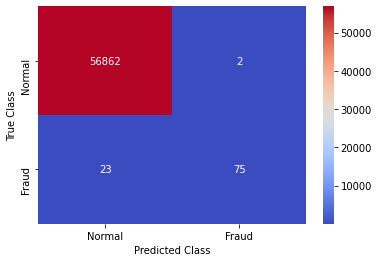

In [19]:
#Confusion matrix using the y_test and predicted outcomes from Random Forest model.
labels =['Normal', 'Fraud']
con_matrix=confusion_matrix(y_test, y_predRFC)
sns.heatmap(con_matrix, xticklabels=labels, yticklabels=labels, annot=True, cmap="coolwarm", fmt='.0f');
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

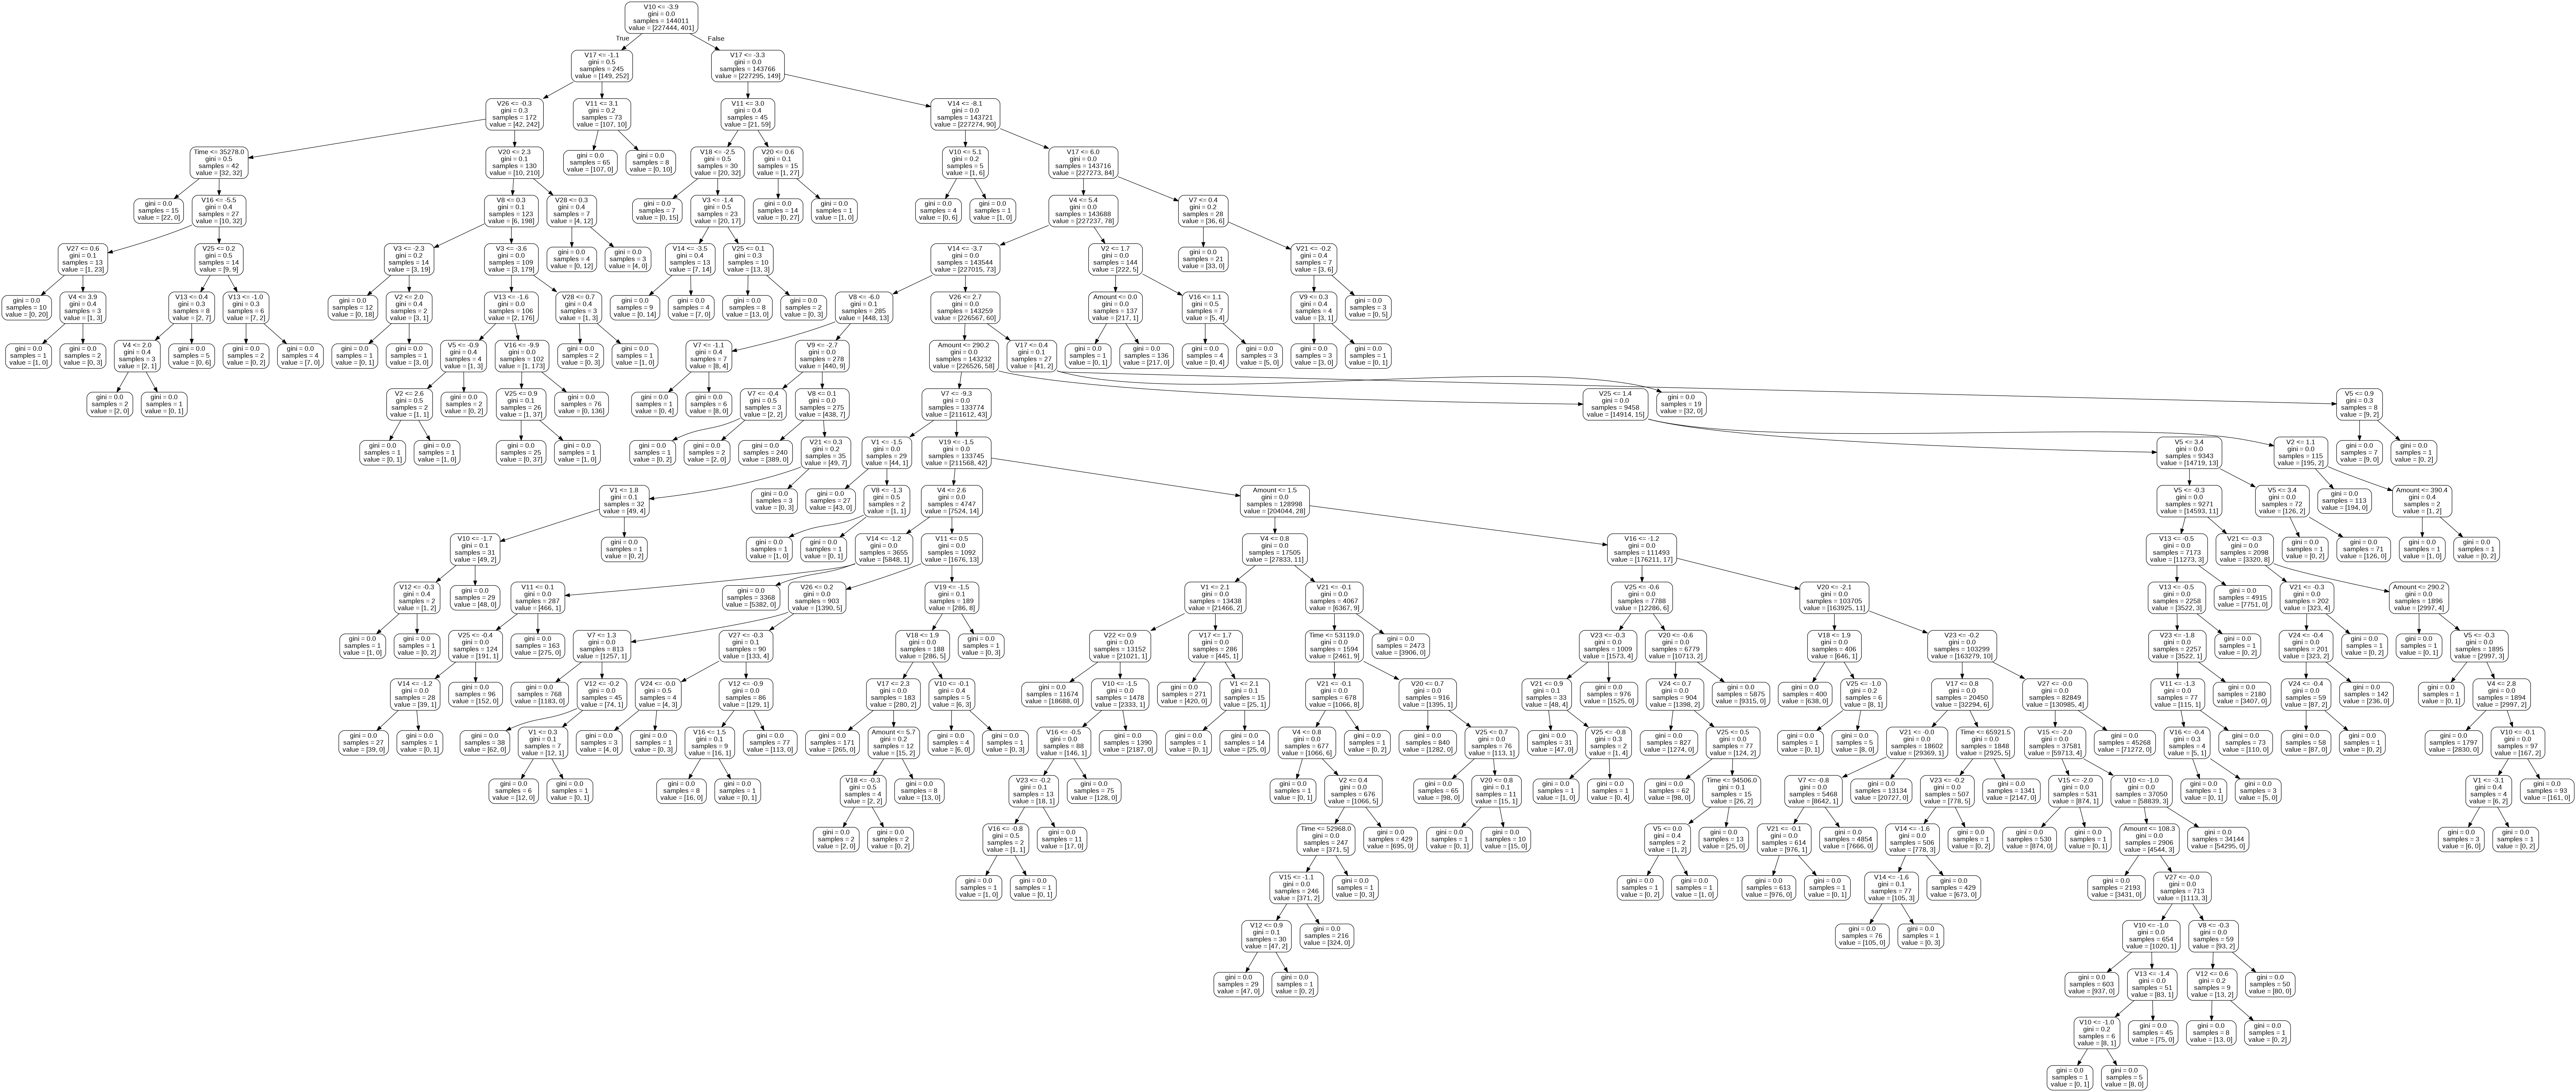

In [26]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
#pulling out one tree from the forest
tree = randforclass.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))

In [90]:
#Create training and testing data sets by splitting for the SMOTE adjusted dataset
#XS proceeds for "X SMOTE"
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=0)

XS_train = np.array(XS_train)
XS_test = np.array(XS_test)
ys_test = np.array(ys_test)

#Using SMOTE function to adjust the data set for the rare event of fraud.
#Also seperate the x and y into seperate dataframes.
X_smote, y_smote = SMOTE().fit_sample(XS_train,ys_train)
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)

#Print the values from the newly adjusted dataframes.
y_smote.iloc[:,0].value_counts()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    199019
0    199019
Name: 0, dtype: int64

In [0]:
#Using the SMOTE adjusted data for the Random Forest Model and testing 
#on the original data "X"
randSMOTE=RandomForestClassifier()
randSMOTE.fit(X_smote, y_smote.values.ravel())

Y_RFC=randSMOTE.predict(X)

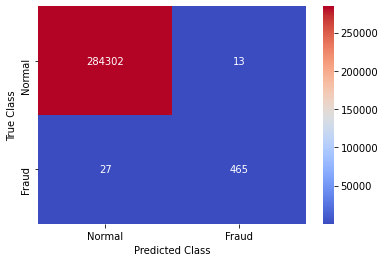

In [92]:
y_test2 = pd.DataFrame(y)
cm2 = confusion_matrix(y_test2, Y_RFC.round())
sns.heatmap(cm2, xticklabels=labels, yticklabels=labels, annot=True, cmap="coolwarm", fmt='.0f');
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [104]:
#evaluate the classifier and printing the scores
n_outRFC=len(Fraudulent)
n_errRFC=(Y_RFC != y).sum()

print("The Model used is {}".format("Random Forest Classifier"))

accur=accuracy_score(y,Y_RFC)
print("Accuracy={}".format(accur))

precise=precision_score(y,Y_RFC)
print("Precision={}".format(precise))

recall=recall_score(y, Y_RFC)
print("Recall={}".format(recall))
  
f1=f1_score(y, Y_RFC)
print("F1={}".format(f1))

MCC=matthews_corrcoef(y, Y_RFC)
print("Matthews correlation coefficient={}".format(MCC))

The Model used is Random Forest Classifier
Accuracy=0.9998595540137707
Precision=0.9728033472803347
Recall=0.9451219512195121
F1=0.9587628865979381
Matthews correlation coefficient=0.9587927682810993


0.9195125987751674


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.92')

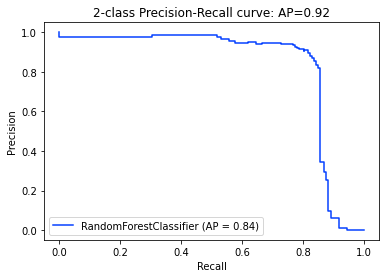

In [105]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


average_precision = average_precision_score(y, Y_RFC)
print(average_precision)

disp = plot_precision_recall_curve(randSMOTE, XS_test, ys_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))